Advanced Insights: 
- What are the top 3 potential candidate states to consider for opening a new store?
- What is the best time of the year to consider opening a store?
- Are there any “outlet-type” effects towards store closures?


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel("DS Internship - EDA - Data.xlsx",parse_dates = True)

In [3]:
df

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01,No Close date,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181232,830,2017,6,BOYS,44711.93,10797.28,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181233,830,2017,6,ACCESSORIES,33539.67,15998.07,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181234,830,2017,6,KIDS,11648.04,12042.24,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation
181235,830,2017,7,BOYS,11455.42,12107.08,2005-11-10,2017-06-26 00:00:00,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation


In [4]:
df.groupby("State")["Sales"].sum()

State
A1     3.738017e+07
A10    2.694839e+08
A2     2.375814e+08
A3     3.946254e+08
A4     2.738552e+08
A5     4.588043e+08
A6     4.067768e+08
A7     2.974110e+08
A8     1.804965e+08
A9     7.421399e+07
B1     2.412378e+08
B10    8.665966e+08
B2     1.664674e+08
B3     2.357359e+08
B4     2.875745e+08
B5     3.568948e+07
B6     2.333596e+08
B7     1.103894e+08
B8     4.722269e+08
B9     1.677735e+08
C1     7.619711e+07
C10    1.638804e+08
C2     1.364229e+08
C3     1.566749e+08
C4     3.025463e+08
C5     1.479976e+08
C6     3.713406e+07
C7     1.252095e+08
C8     1.135608e+08
C9     1.976325e+08
D1     1.852118e+08
D10    7.576237e+07
D2     1.330754e+08
D3     8.073005e+07
D4     1.408493e+08
D5     3.910866e+07
D6     9.797680e+07
D7     1.404259e+08
D8     1.313647e+08
D9     5.820599e+07
E1     1.068184e+07
E2     7.160260e+07
E3     2.438027e+07
E4     2.781166e+07
E5     2.694265e+07
E6     3.192260e+06
Name: Sales, dtype: float64

<AxesSubplot: xlabel='State'>

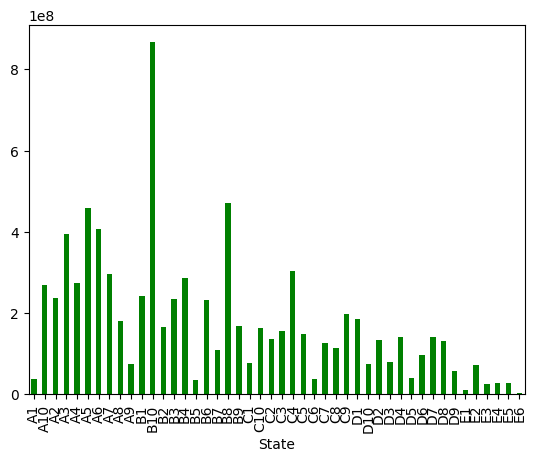

In [5]:
df.groupby("State")["Sales"].sum().plot(kind = "bar",color = "green")

In [15]:
df.groupby("State")["Sales"].sum().nlargest(3)

State
B10    866596553.3
B8     472226869.2
A5     458804278.1
Name: Sales, dtype: float64

In [16]:
df.groupby("Month")["Sales"].sum()

Month
1     4.792742e+08
2     6.154604e+08
3     7.247582e+08
4     6.546139e+08
5     6.303586e+08
6     6.509840e+08
7     6.888494e+08
8     8.653199e+08
9     5.902318e+08
10    5.845302e+08
11    7.094399e+08
12    9.584373e+08
Name: Sales, dtype: float64

<AxesSubplot: xlabel='Month'>

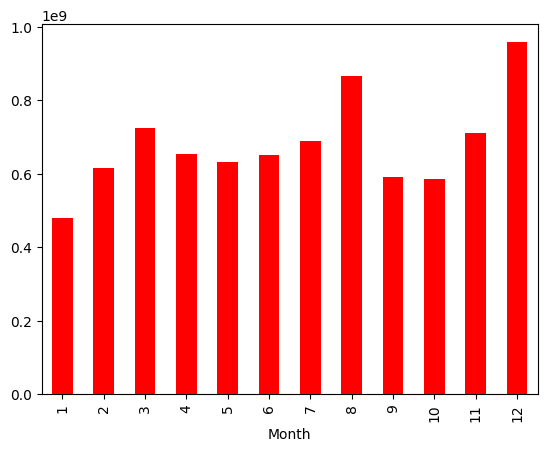

In [17]:
df.groupby("Month")["Sales"].sum().plot(kind = "bar",color = "red")

In [19]:
df.groupby("Month")["Sales"].sum().nlargest(3)

Month
12    9.584373e+08
8     8.653199e+08
3     7.247582e+08
Name: Sales, dtype: float64

In [21]:
df['Outlet Type'].unique()

array(['Outlet', 'Mall', 'Strip'], dtype=object)

In [15]:
mapping = {'Outlet': 0, 'Mall': 1, 'Strip': 2}

df['Outlet Type Numeric'] = df['Outlet Type'].map(mapping)

In [24]:
df['Store Close'].unique()

array(['No Close date', datetime.datetime(2020, 1, 27, 0, 0),
       datetime.datetime(2019, 12, 26, 0, 0), '2019-09-16 00:00:00',
       '2019-01-21 00:00:00', '2019-04-26 00:00:00',
       '2018-01-22 00:00:00', '2019-03-26 00:00:00',
       '2019-01-14 00:00:00', '2019-10-16 00:00:00',
       '2019-11-12 00:00:00', '2018-10-09 00:00:00',
       '2019-06-24 00:00:00', '2018-08-26 00:00:00',
       '2019-09-29 00:00:00', '2018-02-05 00:00:00',
       '2017-06-26 00:00:00', '2017-10-29 00:00:00',
       '2017-01-08 00:00:00', '2017-06-19 00:00:00',
       '2017-05-29 00:00:00', '2017-09-11 00:00:00',
       '2017-08-21 00:00:00', '2017-04-16 00:00:00'], dtype=object)

In [12]:
df['Store Open'] = pd.to_datetime(df['Store Open'])
df['Store Close'] = pd.to_datetime(df['Store Close'],errors='coerce')

no_closure_date = pd.to_datetime('2020-06-30')
df['Store Close'] = df['Store Close'].fillna(no_closure_date)

(df['Store Close'] - df['Store Open']).dt.days

0         10714
1         10714
2         10714
3         10714
4         10714
          ...  
181232     4246
181233     4246
181234     4246
181235     4246
181236     4246
Length: 181237, dtype: int64

In [13]:
df['Days Open'] = (df['Store Close'] - df['Store Open']).dt.days

In [16]:
df

,Store,Year,Month,Super Division,Sales,SGM,Store Open,Store Close,Outlet Type,State,Climate,Total Sq Ft,Store Modification Date,Store Modification,Days Open,Outlet Type Numeric
0,1,2015,2,GIRLS,63635.80,35692.09,1991-03-01,2020-06-30,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,10714,0
1,1,2015,2,BOYS,20872.93,15691.34,1991-03-01,2020-06-30,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,10714,0
2,1,2015,2,ACCESSORIES,38717.03,23866.25,1991-03-01,2020-06-30,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,10714,0
3,1,2015,2,KIDS,11455.00,12110.00,1991-03-01,2020-06-30,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,10714,0
4,1,2015,3,GIRLS,67507.77,42237.79,1991-03-01,2020-06-30,Outlet,A1,Frigid,4735.0,2011-10-06 00:00:00,relocation,10714,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181232,830,2017,6,BOYS,44711.93,10797.28,2005-11-10,2017-06-26,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation,4246,2
181233,830,2017,6,ACCESSORIES,33539.67,15998.07,2005-11-10,2017-06-26,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation,4246,2
181234,830,2017,6,KIDS,11648.04,12042.24,2005-11-10,2017-06-26,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation,4246,2
181235,830,2017,7,BOYS,11455.42,12107.08,2005-11-10,2017-06-26,Strip,B9,Hot,5730.5,2014-02-06 00:00:00,relocation,4246,2


In [17]:
rel_df = df.iloc[:,-2:]

In [18]:
rel_df

,Days Open,Outlet Type Numeric
0,10714,0
1,10714,0
2,10714,0
3,10714,0
4,10714,0
...,...,...
181232,4246,2
181233,4246,2
181234,4246,2
181235,4246,2


<AxesSubplot: >

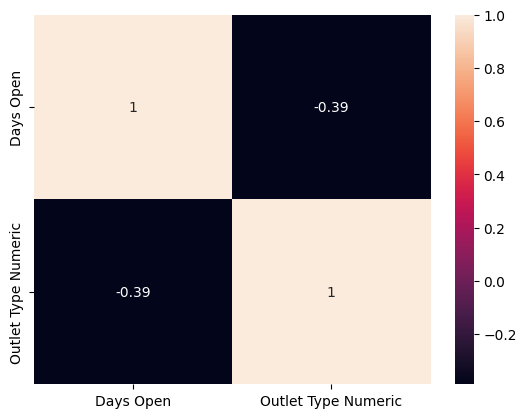

In [21]:
sns.heatmap(rel_df.corr(),annot = True)

In [19]:
from statsmodels.stats.weightstats import ztest

In [20]:
statistic, p_value = ztest(df["Days Open"],df['Outlet Type Numeric'])

print("Z-test Statistic:", statistic)
print("P-value:", p_value)

Z-test Statistic: 803.7950023814341
P-value: 0.0


H0: There is no association between outlet type and store closures

Ha: There is an association between outlet type and store closures

In [29]:
contingency_table = pd.crosstab(df['Store Close'],df['Outlet Type'])

contingency_table

Outlet Type,Mall,Outlet,Strip
Store Close,,,
2017-01-08,0,185,379
2017-04-16,107,0,0
2017-05-29,114,112,0
2017-06-19,454,675,696
2017-06-26,1061,2225,1416
2017-08-21,244,0,0
2017-09-11,127,0,127
2017-10-29,127,0,132
2018-01-22,144,143,423


In [30]:
contingency_table = pd.crosstab(df['Store Close'],df['Outlet Type'])

contingency_table

Outlet Type,Mall,Outlet,Strip
Store Close,,,
2017-01-08,0,185,379
2017-04-16,107,0,0
2017-05-29,114,112,0
2017-06-19,454,675,696
2017-06-26,1061,2225,1416
2017-08-21,244,0,0
2017-09-11,127,0,127
2017-10-29,127,0,132
2018-01-22,144,143,423


In [32]:
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies: \n", expected)

Chi-square statistic: 19464.30538527664
P-value: 0.0
Degrees of freedom: 46
Expected frequencies: 
 [[2.68352555e+02 6.68633005e+01 2.28784145e+02]
 [5.09108571e+01 1.26850588e+01 4.34040842e+01]
 [1.07531343e+02 2.67927410e+01 9.16759161e+01]
 [8.68339384e+02 2.16357311e+02 7.40303305e+02]
 [2.23722290e+03 5.57431275e+02 1.90734583e+03]
 [1.16095786e+02 2.89266761e+01 9.89775377e+01]
 [1.20853810e+02 3.01121956e+01 1.03033994e+02]
 [1.23232822e+02 3.07049554e+01 1.05062222e+02]
 [3.37819706e+02 8.41718854e+01 2.88008409e+02]
 [1.04676529e+01 2.60814293e+00 8.92420422e+00]
 [1.63200224e+02 4.06633193e+01 1.39136457e+02]
 [8.51686300e+01 2.12207993e+01 7.26105707e+01]
 [1.53779336e+03 3.83159907e+02 1.31104673e+03]
 [8.40267043e+02 2.09362746e+02 7.16370211e+02]
 [3.78262910e+02 9.42488013e+01 3.22488289e+02]
 [1.86752443e+03 4.65316409e+02 1.59215916e+03]
 [2.01264416e+02 5.01474754e+01 1.71588108e+02]
 [1.95078985e+02 4.86063000e+01 1.66314715e+02]
 [1.03249121e+02 2.57257734e+01 8.80